In [1]:
# Standard stuff
import numpy as np
from matplotlib import pyplot as plt

from utils.plot_utils import newplot

import os, sys
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


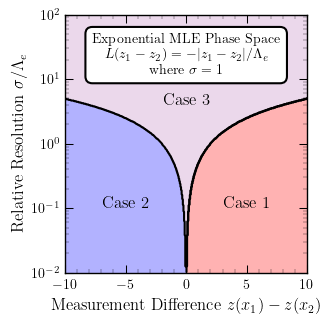

In [2]:
fig, ax = newplot("column")

# Define the ranges for x1 - x2 and sigma/Lambda

sigma = 1

x1_minus_x2_range = np.linspace(-10, 10, 400)
sigma_over_lambda_range = np.logspace(-2, 2, 400)



# Create a grid
X, Y = np.meshgrid(x1_minus_x2_range, sigma_over_lambda_range)
Z = np.zeros(X.shape)

# Calculate log-likelihood for each case
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x1_minus_x2 = X[i, j]
        sigma_over_lambda = Y[i, j]

        lambda_ = sigma / sigma_over_lambda

        # Case 1 (1a)
        L1 = -np.abs(x1_minus_x2 - 2*sigma_over_lambda)/lambda_ - sigma_over_lambda**2

        # Case 2 (1b)
        L2 = -np.abs(x1_minus_x2 + 2*sigma_over_lambda)/lambda_ - sigma_over_lambda**2

        # Case 3 (Case 2)
        L3 = -(x1_minus_x2**2) / 4 / sigma**2

        # Determine which case has the highest log-likelihood
        Z[i, j] = np.argmax([L1, L2, L3]) + 1

# Plot the regions
plt.contourf(X, Y, Z, levels=[0.5, 1.5, 2.5, 3.5], colors=['red', 'blue', 'purple'], alpha=0.3)

# Add shading for better greyscale visibility
plt.contourf(X, Y, Z, levels=[2.5, 3.5], colors=['white'], alpha=0.5)


# Plot the boundaries using contour
plt.contour(X, Y, Z, levels=[1, 2, 3], colors='black')


# plt.colorbar(ticks=[1, 2, 3], label='Case')
plt.xlabel(rf'Measurement Difference $z(x_1) - z(x_2)$')
plt.ylabel(rf'Relative Resolution $\sigma / \Lambda_e$')

# Text labels for the regions
plt.text(5, 0.1, 'Case 1', color='black', ha = "center", weight='bold')
plt.text(-5, 0.1, 'Case 2', color='black', ha = "center", weight='bold')
plt.text(0, 4, 'Case 3', color='black', ha = "center", weight='bold')



# Text in the upper left
plt.gcf().text(0.5, 0.925, 'Exponential MLE Phase Space\n$L(z_1 - z_2) = -|z_1-z_2|/\Lambda_e$\nwhere $\sigma = 1$', transform=plt.gca().transAxes, fontsize = 10,
        ha = 'center',multialignment='center', verticalalignment='top', backgroundcolor='white',bbox=dict(facecolor='w', linewidth=1.5,edgecolor='black', boxstyle='round,pad=0.5'))


plt.yscale('log')

plt.savefig("phase_space.pdf")